# Project 2: Predicting Healthcare Costs

## Imports / Initializations

In [42]:
#Import Libraries and dependencies

#To View and Analyze data
import numpy as np
import pandas as pd

#Matplotlib, Seaborn and Plotly for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode

#Linear Regression using Scikit-learn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

#Remove Warning Messages
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Initializing plot parameters
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20 ,1)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Arial:bold'
plt.rcParams['mathtext.it'] = 'Arial:italic'

## Data Review

In [24]:
# Importing CSV produced by data_cleaning into DataFrame
df_healthcare = pd.read_csv("Resources/2018_FYC.csv", index_col='ID')

# Reviewing Dataframe
df_healthcare.head()

Family_Size  Region  Age  Sex  Race  Education_Level  Highest_Degree  \
ID                                                                              
2290001            2       2   27    2     1               16               4   
2290001            2       2   25    1     1               17               4   
2290002            6       2   34    2     1               10               3   
2290002            6       2   39    1     1               10               3   
2290003            4       2   36    2     1               17               5   

          BMI  Tobacco_Use  Total_Personal_Income  Total_Expenditure  \
ID                                                                     
2290001  21.4            3                  32000               2368   
2290001  30.6            3                      0               2040   
2290002  28.2            3                  25000                173   
2290002  28.7            3                  30000                  0   
2290003  21.5            3                  30217                535   

         Exp_Pocket  Exp_Medicare  Total_Medicaid  Exp_VA  Total_Priv_Tri  \
ID                                                                          
2290001         225             0            2037       0             107   
2290001         136             0               0       0            1904   
2290002          74             0               0       0              99   
2290002           0             0               0       0               0   
2290003         232             0               0       0             303   

         Total_Other  
ID                    
2290001            0  
2290001            0  
2290002            0  
2290002            0  
2290003            0

In [25]:
# Reviewing statistical summary of our dataset
df_healthcare.describe()

Family_Size        Region           Age           Sex          Race  \
count  16765.000000  16765.000000  16765.000000  16765.000000  16765.000000   
mean       2.683627      2.709514     52.132956      1.546018      1.829824   
std        1.516079      1.015959     17.578071      0.497893      2.345150   
min        1.000000      1.000000     21.000000      1.000000      1.000000   
25%        2.000000      2.000000     37.000000      1.000000      1.000000   
50%        2.000000      3.000000     53.000000      2.000000      1.000000   
75%        4.000000      4.000000     66.000000      2.000000      1.000000   
max       16.000000      4.000000     85.000000      2.000000     12.000000   

       Education_Level  Highest_Degree           BMI   Tobacco_Use  \
count     16765.000000    16765.000000  16765.000000  16765.000000   
mean         13.301939        3.517626     25.783370      2.688697   
std           3.322425        1.833958     12.613749      0.680992   
min         -15.000000      -15.000000    -15.000000      1.000000   
25%          12.000000        3.000000     23.100000      3.000000   
50%          14.000000        3.000000     27.000000      3.000000   
75%          16.000000        4.000000     31.700000      3.000000   
max          17.000000        7.000000     71.100000      3.000000   

       Total_Personal_Income  Total_Expenditure     Exp_Pocket   Exp_Medicare  \
count           16765.000000       16765.000000   16765.000000   16765.000000   
mean            42114.205905        8397.290963     980.574172    2776.821593   
std             41714.836289       20058.995682    2792.395875   10319.833123   
min           -309948.000000           0.000000       0.000000       0.000000   
25%             13806.000000         589.000000      34.000000       0.000000   
50%             30992.000000        2448.000000     295.000000       0.000000   
75%             57188.000000        7978.000000     984.000000     715.000000   
max            318505.000000      807611.000000  156602.000000  236672.000000   

       Total_Medicaid         Exp_VA  Total_Priv_Tri    Total_Other  
count    16765.000000   16765.000000    16765.000000   16765.000000  
mean      1035.347987     269.423143     3065.319356     230.309633  
std       6984.806823    3017.323998    13436.433349    2741.622994  
min          0.000000       0.000000        0.000000       0.000000  
25%          0.000000       0.000000        0.000000       0.000000  
50%          0.000000       0.000000      224.000000       0.000000  
75%          0.000000       0.000000     1776.000000       0.000000  
max     329847.000000  121108.000000   790087.000000  219316.000000

In [26]:
# Examining Dataframe values & columns
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16765 entries, 2290001 to 2329687
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Family_Size            16765 non-null  int64  
 1   Region                 16765 non-null  int64  
 2   Age                    16765 non-null  int64  
 3   Sex                    16765 non-null  int64  
 4   Race                   16765 non-null  int64  
 5   Education_Level        16765 non-null  int64  
 6   Highest_Degree         16765 non-null  int64  
 7   BMI                    16765 non-null  float64
 8   Tobacco_Use            16765 non-null  int64  
 9   Total_Personal_Income  16765 non-null  int64  
 10  Total_Expenditure      16765 non-null  int64  
 11  Exp_Pocket             16765 non-null  int64  
 12  Exp_Medicare           16765 non-null  int64  
 13  Total_Medicaid         16765 non-null  int64  
 14  Exp_VA                 16765 non-null  int64  

In [27]:
# Checking for null values in our data
df_healthcare.isnull().sum()

Family_Size              0
Region                   0
Age                      0
Sex                      0
Race                     0
Education_Level          0
Highest_Degree           0
BMI                      0
Tobacco_Use              0
Total_Personal_Income    0
Total_Expenditure        0
Exp_Pocket               0
Exp_Medicare             0
Total_Medicaid           0
Exp_VA                   0
Total_Priv_Tri           0
Total_Other              0
dtype: int64

## CHECKING DISTRIBUTION OF VARIABLES

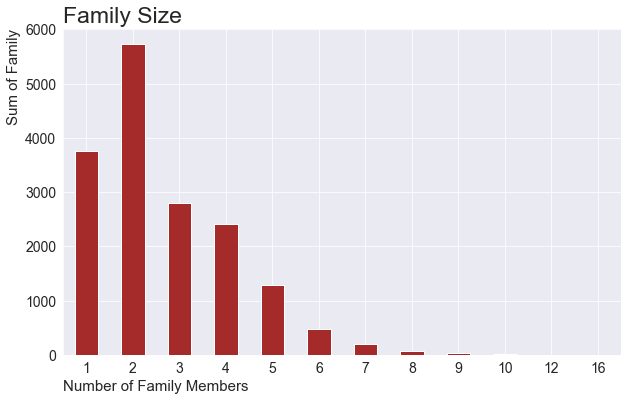

In [44]:
# Distribution of children
# Plotting children counts using bar plot
df_healthcare.Family_Size.value_counts().sort_index().plot(kind = 'bar', figsize = (10, 6), color = "brown")

# Adjusting plot parameters
plt.title('Family Size', fontdict = {'fontsize': 23}, loc = 'left')
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Number of Family Members', fontsize = 15, loc = 'left')
plt.ylabel('Sum of Family', fontsize = 15, loc = 'top')
sns.despine()
plt.show()

In [45]:
#Lets look at age distribution in our dataset
fig = px.histogram(df_healthcare, 
                   x='Age', 
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)

# Displaying plot
fig.show()

In [50]:
# Lets look at BMI distribution in dataset
fig = px.histogram(df_healthcare, 
                   x='BMI', 
                   marginal='box', 
                   color_discrete_sequence=['orange'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

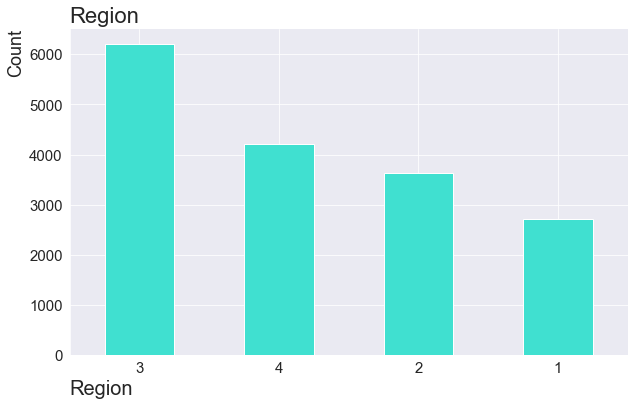

In [49]:
# Distribution of regions
df_healthcare.Region.value_counts().plot(kind = 'bar', figsize = (10, 6), color = "turquoise")
plt.title('Region', fontdict = {'fontsize': 22, 'fontweight': 'medium'}, loc = 'left')
plt.xticks(rotation = 0, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Region', fontsize = 20, loc = 'left')
plt.ylabel('Count', fontsize = 18, loc = 'top')
sns.despine()
plt.show()

In [52]:
# Lets look at BMI distribution in dataset

fig = px.histogram(df_healthcare, 
                   x='Total_Expenditure', 
                   marginal='box', 
                   color_discrete_sequence=['green'], 
                   title='Distribution of charges')
fig.update_layout(bargap=0.1)
fig.show()

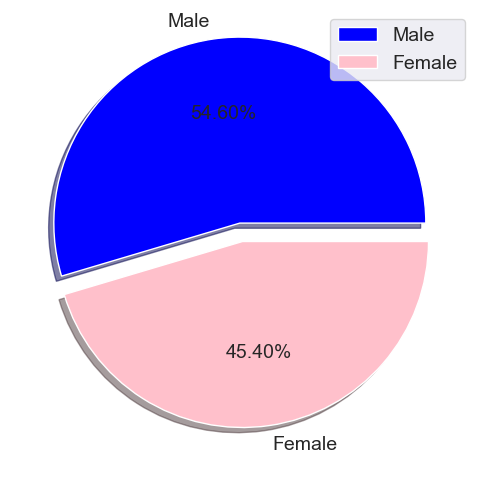

In [37]:
# Gender Proportion
count = df_healthcare.Sex.value_counts()
count

# Creating Pie Chart piechart
labels = ['Male', 'Female']
explode = [0.1, 0]
colors = ['blue', 'pink']

plt.figure(figsize= (6,9), dpi =100,facecolor='white')
plt.pie(count, explode=[0.1, 0], labels= labels, colors= colors, autopct='%0.02f%%', shadow=True)
plt.legend()


In [54]:
# Looking at distribution of charges by gender
fig = px.histogram(df_healthcare,
                   x = 'Total_Expenditure',
                   color = 'Sex',
                   color_discrete_sequence = ["pink","blue"],
                   title = 'Charges and Gender Distribution'
               
)
fig.update_layout(bargap=0.1)
fig.show()

In [55]:
# Distribution of smokers and gender
px.histogram(df_healthcare, x='Tobacco_Use', color='Sex', color_discrete_sequence=["pink","blue"], title='Smoker and Gender Distribution')

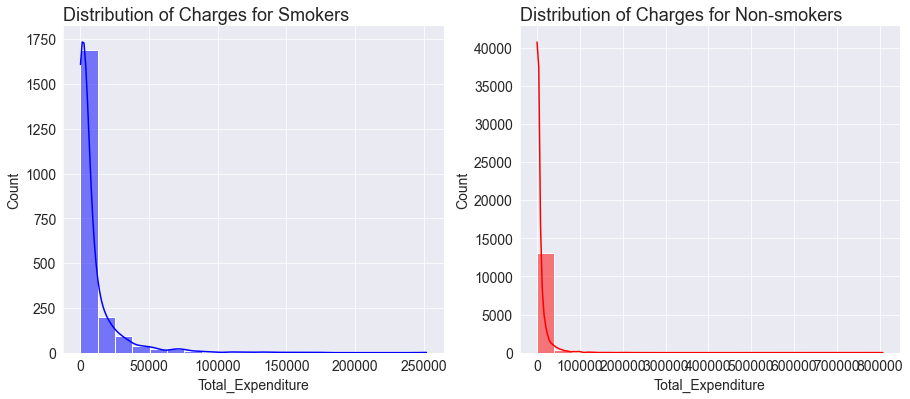

In [58]:
# Distribution of charges for smokers
# Creating plot
fig = plt.figure(figsize = (15, 6))

# Adding subplot
ax = fig.add_subplot(121)
sns.histplot(df_healthcare[(df_healthcare.Tobacco_Use == 0|1)]['Total_Expenditure'], color = "blue", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for Smokers', fontdict = {'fontsize': 18}, loc = 'left')

ax = fig.add_subplot(122)
sns.histplot(df_healthcare[(df_healthcare.Tobacco_Use == 3)]['Total_Expenditure'], color = "red", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for Non-smokers', fontdict = {'fontsize': 18}, loc = 'left')

sns.despine()

# Displaying plot
plt.show()

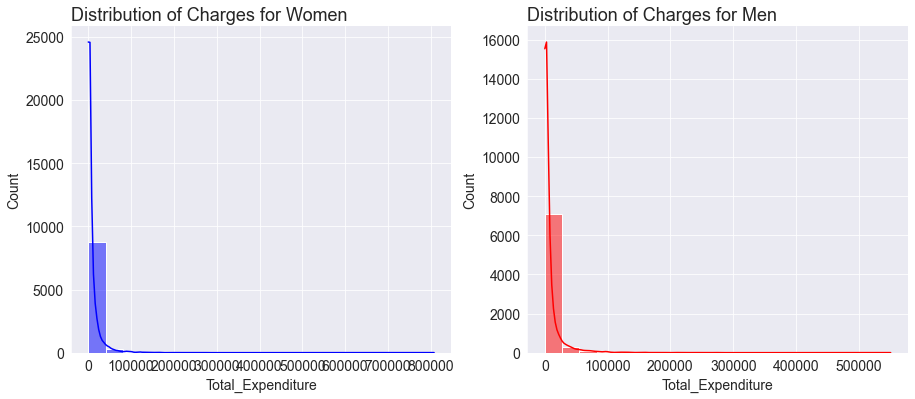

In [60]:
# Distribution of charges for gender
# Creating Plot
fig = plt.figure(figsize = (15, 6))

# Adding subplot
ax = fig.add_subplot(121)
sns.histplot(df_healthcare[(df_healthcare.Sex == 2)]['Total_Expenditure'], color = "blue", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for Women', fontdict = {'fontsize': 18}, loc = 'left')

ax = fig.add_subplot(122)
sns.histplot(df_healthcare[(df_healthcare.Sex == 1)]['Total_Expenditure'], color = "red", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for Men', fontdict = {'fontsize': 18}, loc = 'left')

sns.despine()

# Displaying plot
plt.show()

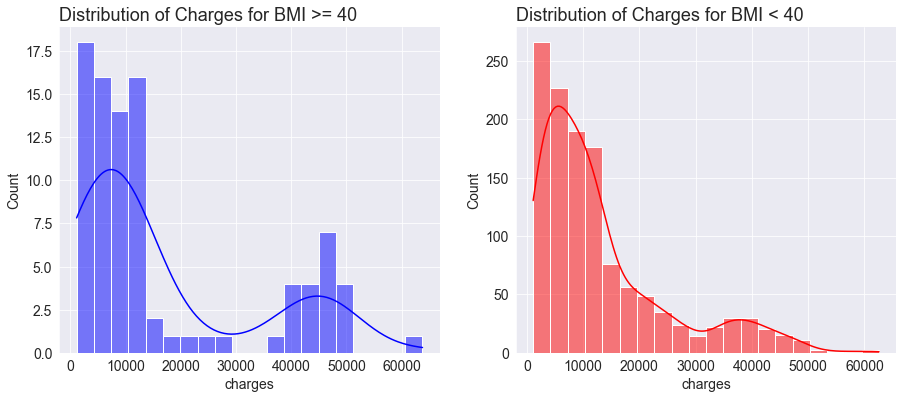

In [18]:
# Distribution of charges for bmi

fig = plt.figure(figsize = (15, 6))

ax = fig.add_subplot(121)
sns.histplot(df_healthcare[(df_healthcare.bmi >= 40)]['charges'], color ="blue", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for BMI >= 40', fontdict = {'fontsize': 18}, loc = 'left')

ax = fig.add_subplot(122)
sns.histplot(df_healthcare[(df_healthcare.bmi < 40)]['charges'], color = "red", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for BMI < 40', fontdict = {'fontsize': 18}, loc = 'left')

sns.despine()

plt.show()

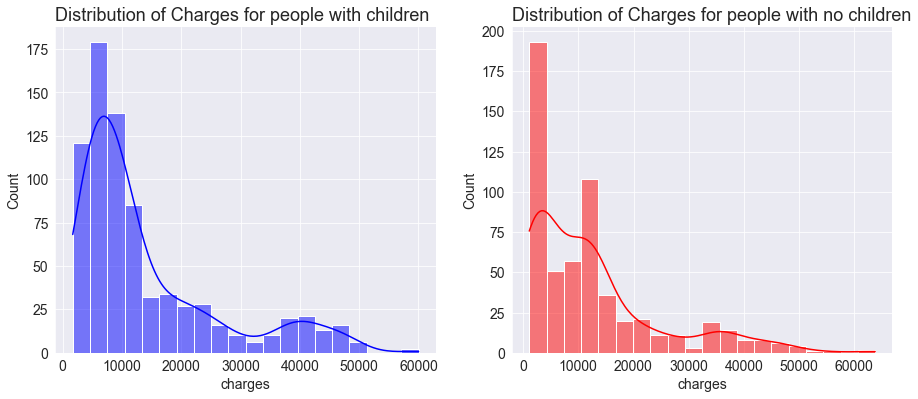

In [19]:
# Distribution of charges for children

fig = plt.figure(figsize = (15, 6))

ax = fig.add_subplot(121)
sns.histplot(df_healthcare[(df_healthcare.children != 0)]['charges'], color = "blue", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for people with children', fontdict = {'fontsize': 18}, loc = 'left')

ax = fig.add_subplot(122)
sns.histplot(df_healthcare[(df_healthcare.children == 0)]['charges'], color = "red", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for people with no children', fontdict = {'fontsize': 18}, loc = 'left')

sns.despine()

plt.show()

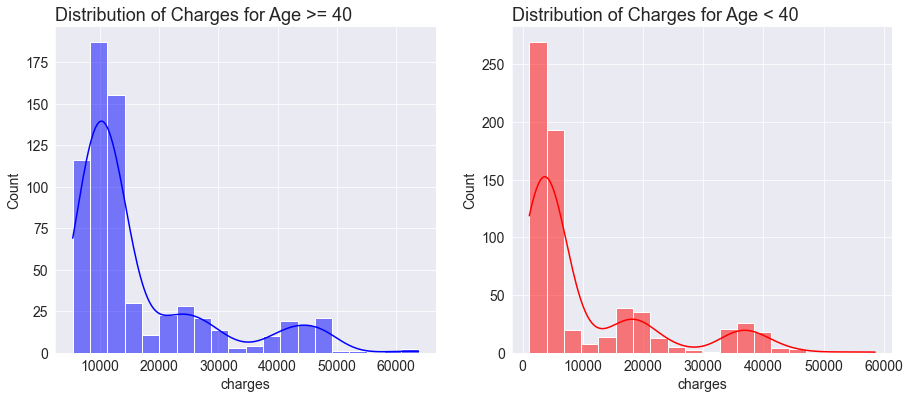

In [20]:
# Distribution of charges for smokers

fig = plt.figure(figsize = (15, 6))

ax = fig.add_subplot(121)
sns.histplot(df_healthcare[(df_healthcare.age >= 40)]['charges'], color = "blue", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for Age >= 40', fontdict = {'fontsize': 18}, loc = 'left')

ax = fig.add_subplot(122)
sns.histplot(df_healthcare[(df_healthcare.age < 40)]['charges'], color = "red", ax = ax, kde = True, bins = 20)
ax.set_title('Distribution of Charges for Age < 40', fontdict = {'fontsize': 18}, loc = 'left')

sns.despine()

plt.show()

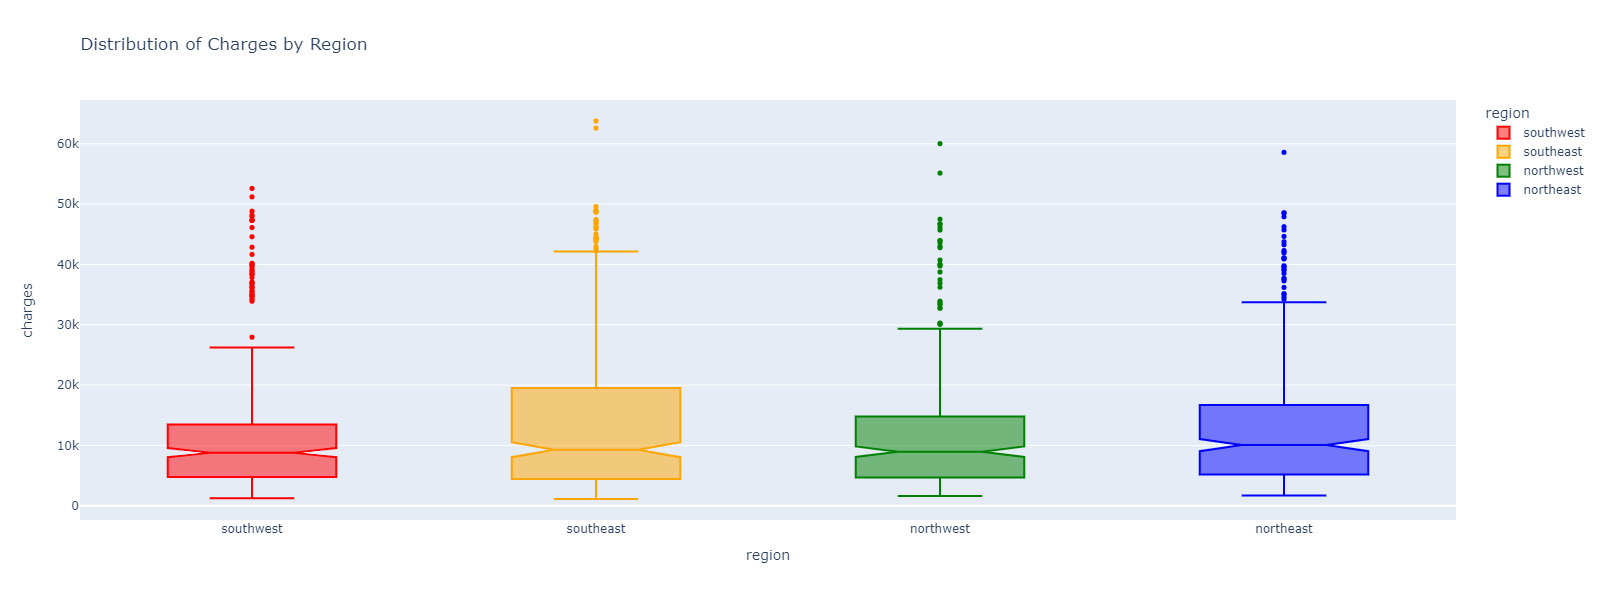

In [21]:
# looking at distribution of charges accross regions
fig = px.box(df_healthcare, x="region", y="charges", color="region", 
             notched=True, points="outliers", height=600,
             title="Distribution of Charges by Region",
             color_discrete_sequence=['red', 'orange', 'green', 'blue'])
fig.update_traces(marker_size=5)
fig.show()


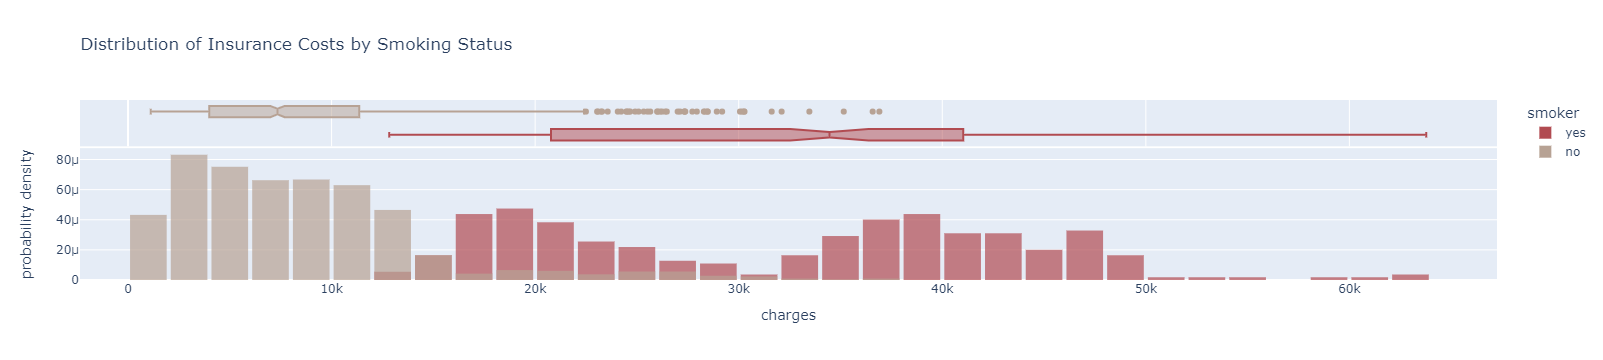

In [22]:
# Distribution of charges by smoking status
fig=px.histogram(df_healthcare, x='charges', color='smoker', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box', 
                 title="Distribution of Insurance Costs by Smoking Status",
                 color_discrete_sequence=['#B14B51','#B7A294']) 
fig.update_layout(bargap=0.1)
fig.show()

OLGA's part section 4:

Visualizing how the "charges" column is related to other columns ("children", "sex", "region" and "smoker").

    1. Visualizations
    
    2. Correlation
    
    3. Linear regression (skikit-learn)
    
    4. Loss/cost
    
    

# Visualizations

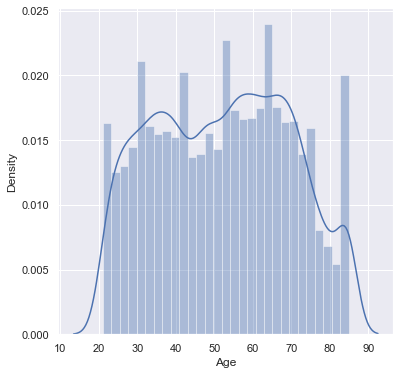

In [61]:
#distribution of age value column(what age group predominant in our data)
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df_healthcare["Age"])
plt.show()
#this density plot shows us that we have more sample of group beloning to age 19-22

In [62]:
px.violin(df_healthcare, x='Family_Size', y='Total_Expenditure')# here we can see not there is not a lot of coorelation between #of children and amoumt of children

In [63]:
df_healthcare["Family_Size"].value_counts()#574 samples out of data have no children

2     5727
1     3751
3     2802
4     2407
5     1279
6      468
7      195
8       79
9       32
10      22
16       2
12       1
Name: Family_Size, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Total_Expenditure'>

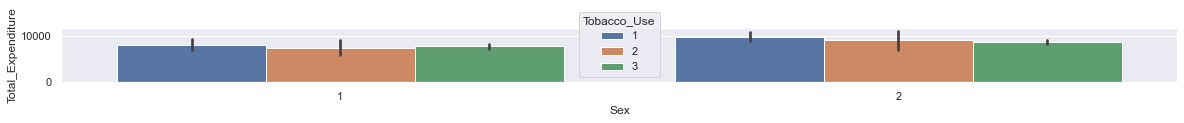

In [65]:
sns.barplot(data = df_healthcare,x = 'Sex',y = 'Total_Expenditure', hue = "Tobacco_Use")

In [66]:
px.histogram(df_healthcare,x='Sex',y = 'Total_Expenditure', color = 'Region')

In [28]:
# No longer needed
# from sklearn.preprocessing import LabelEncoder

In [67]:
# No longer needed
#Data pre-processing
#encoding the categorical features
# sex 0 or 1
# label = LabelEncoder()
# label.fit(df_healthcare.sex.drop_duplicates())
# df_healthcare.sex = label.transform(df_healthcare.sex)
# smoker or not
# label.fit(df_healthcare.smoker.drop_duplicates())
# df_healthcare.smoker = label.transform(df_healthcare.smoker)
#region, each hregion has a number
# label.fit(df_healthcare.region.drop_duplicates())
# df_healthcare.region = label.transform(df_healthcare.region)

# df_healthcare

# Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [69]:
df_healthcare.Total_Expenditure.corr(df_healthcare.Age)

0.1767085457348524

In [70]:
df_healthcare.Total_Expenditure.corr(df_healthcare.BMI)

0.043884323332263185

In [71]:
df_healthcare.Family_Size.corr(df_healthcare.Total_Expenditure)

-0.1021480716806319

In [72]:
df_healthcare.corr()

Family_Size    Region       Age       Sex      Race  \
Family_Size               1.000000  0.073283 -0.357767  0.014468  0.056664   
Region                    0.073283  1.000000 -0.014465  0.003669  0.078696   
Age                      -0.357767 -0.014465  1.000000  0.001499 -0.071350   
Sex                       0.014468  0.003669  0.001499  1.000000  0.019862   
Race                      0.056664  0.078696 -0.071350  0.019862  1.000000   
Education_Level          -0.083093 -0.049103 -0.109416  0.002851 -0.012598   
Highest_Degree           -0.064824 -0.032341 -0.065192  0.018334 -0.017520   
BMI                      -0.029523 -0.040750 -0.039557 -0.004130 -0.036742   
Tobacco_Use               0.039915  0.046037  0.065678  0.087028  0.002422   
Total_Personal_Income    -0.034275 -0.009938 -0.011595 -0.174618 -0.034755   
Total_Expenditure        -0.102148 -0.033777  0.176709  0.026011 -0.025403   
Exp_Pocket               -0.098254 -0.006619  0.148450  0.026075 -0.045581   
Exp_Medicare             -0.143786 -0.031718  0.275058  0.011647 -0.017868   
Total_Medicaid           -0.021742 -0.027493 -0.000015  0.046777  0.012208   
Exp_VA                   -0.044256 -0.003839  0.071192 -0.070445 -0.009510   
Total_Priv_Tri           -0.000688 -0.010748 -0.003054  0.016745 -0.023447   
Total_Other               0.000710  0.005956  0.044215 -0.006930  0.019784   

                       Education_Level  Highest_Degree       BMI  Tobacco_Use  \
Family_Size                  -0.083093       -0.064824 -0.029523     0.039915   
Region                       -0.049103       -0.032341 -0.040750     0.046037   
Age                          -0.109416       -0.065192 -0.039557     0.065678   
Sex                           0.002851        0.018334 -0.004130     0.087028   
Race                         -0.012598       -0.017520 -0.036742     0.002422   
Education_Level               1.000000        0.664594  0.032217     0.127733   
Highest_Degree                0.664594        1.000000  0.028231     0.119192   
BMI                           0.032217        0.028231  1.000000    -0.004025   
Tobacco_Use                   0.127733        0.119192 -0.004025     1.000000   
Total_Personal_Income         0.337116        0.263326  0.013093     0.109082   
Total_Expenditure            -0.008865       -0.006625  0.043884    -0.008670   
Exp_Pocket                    0.057052        0.044119  0.019880     0.043164   
Exp_Medicare                 -0.065909       -0.052616  0.005412     0.003934   
Total_Medicaid               -0.080181       -0.071564  0.025336    -0.065316   
Exp_VA                       -0.004244        0.004186  0.015404    -0.023111   
Total_Priv_Tri                0.070475        0.059721  0.038087     0.015225   
Total_Other                  -0.012659       -0.011100  0.007182    -0.003203   

                       Total_Personal_Income  Total_Expenditure  Exp_Pocket  \
Family_Size                        -0.034275          -0.102148   -0.098254   
Region                             -0.009938          -0.033777   -0.006619   
Age                                -0.011595           0.176709    0.148450   
Sex                                -0.174618           0.026011    0.026075   
Race                               -0.034755          -0.025403   -0.045581   
Education_Level                     0.337116          -0.008865    0.057052   
Highest_Degree                      0.263326          -0.006625    0.044119   
BMI                                 0.013093           0.043884    0.019880   
Tobacco_Use                         0.109082          -0.008670    0.043164   
Total_Personal_Income               1.000000          -0.034551    0.078948   
Total_Expenditure                  -0.034551           1.000000    0.316241   
Exp_Pocket                          0.078948           0.316241    1.000000   
Exp_Medicare                       -0.092236           0.573961    0.104214   
Total_Medicaid                     -0.107370         

Here's how correlation coefficients can be interpreted

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

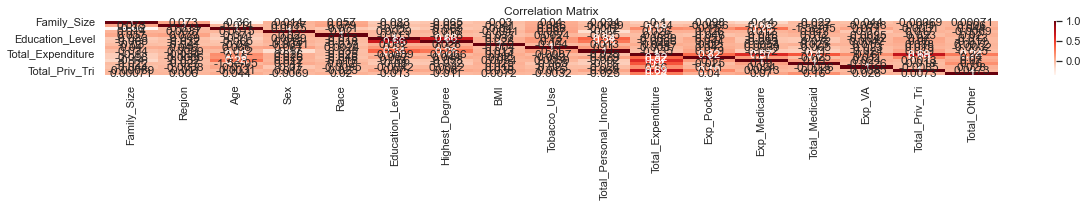

In [73]:
sns.heatmap(df_healthcare.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

We now know that the "smoker" and "age" columns have the strongest correlation with "charges".

## Linear Regression using Scikit-learn for Non Smokers

Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [77]:
non_smoker_df = df_healthcare[df_healthcare.Tobacco_Use == 3 ]

In [78]:
non_smoker_df

Family_Size  Region  Age  Sex  Race  Education_Level  Highest_Degree  \
ID                                                                              
2290001            2       2   27    2     1               16               4   
2290001            2       2   25    1     1               17               4   
2290002            6       2   34    2     1               10               3   
2290002            6       2   39    1     1               10               3   
2290003            4       2   36    2     1               17               5   
...              ...     ...  ...  ...   ...              ...             ...   
2329682            4       4   32    1     1               16               4   
2329684            2       3   59    2     1               16               4   
2329685            1       3   69    2     2               17               5   
2329687            3       4   33    2     1               16               4   
2329687            3       4   32    1     1               13               3   

          BMI  Tobacco_Use  Total_Personal_Income  Total_Expenditure  \
ID                                                                     
2290001  21.4            3                  32000               2368   
2290001  30.6            3                      0               2040   
2290002  28.2            3                  25000                173   
2290002  28.7            3                  30000                  0   
2290003  21.5            3                  30217                535   
...       ...          ...                    ...                ...   
2329682  23.7            3                  69009               1939   
2329684  34.3            3                  43670               2953   
2329685  45.7            3                  55132               2439   
2329687  29.2            3                  18000              17820   
2329687  27.3            3                  47874                 90   

         Exp_Pocket  Exp_Medicare  Total_Medicaid  Exp_VA  Total_Priv_Tri  \
ID                                                                          
2290001         225             0            2037       0             107   
2290001         136             0               0       0            1904   
2290002          74             0               0       0              99   
2290002           0             0               0       0               0   
2290003         232             0               0       0             303   
...             ...           ...             ...     ...             ...   
2329682        1675             0               0       0             264   
2329684         966             0               0       0            1987   
2329685         859          1265               0       0             313   
2329687        2114             0               0       0           15706   
2329687          90             0               0       0               0   

         Total_Other  
ID                    
2290001            0  
2290001            0  
2290002            0  
2290002            0  
2290003            0  
...              ...  
2329682            0  
2329684            0  
2329685            0  
2329687            0  
2329687            0  

[13636 rows x 17 columns]

In [79]:
non_smoker_df.dtypes

### THE END OF WHERE I GOT TO ADAPTING TO NEW DATA
### NEED TO MODIFY TOTAL EXPENDITURE TO ELIMINATE OUTLIERS
### NEED TO ADJ BMI

Family_Size                int64
Region                     int64
Age                        int64
Sex                        int64
Race                       int64
Education_Level            int64
Highest_Degree             int64
BMI                      float64
Tobacco_Use                int64
Total_Personal_Income      int64
Total_Expenditure          int64
Exp_Pocket                 int64
Exp_Medicare               int64
Total_Medicaid             int64
Exp_VA                     int64
Total_Priv_Tri             int64
Total_Other                int64
dtype: object

Next, let's visualize the relationship between "age" and "charges"

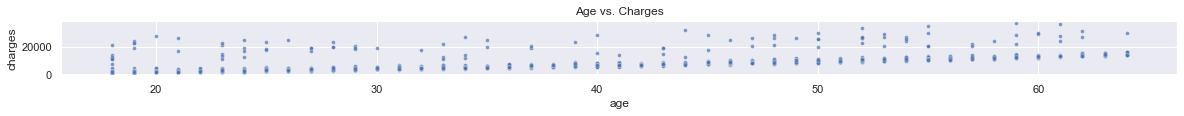

In [38]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. 

In [39]:
model = LinearRegression()

In [40]:
#create X and Y data matrices
X = non_smoker_df.drop(columns=["charges", "smoker"], axis=1)
y = non_smoker_df.charges
print('X.shape :', X.shape)
print('y.shape :', y.shape)


X.shape : (1064, 5)
y.shape : (1064,)


In [41]:
#Perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Data dimention
X_train.shape, y_train.shape

((851, 5), (851,))

In [43]:
X_test.shape, y_test.shape

((213, 5), (213,))

In [44]:
from sklearn import linear_model
#Compute performance of the model
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
#Build Linear regression
model = LinearRegression()

In [46]:
#build training model
model.fit(X_train, y_train)

LinearRegression()

In [47]:
#Apply trained model to make prediction (on test set)
y_pred = model.predict(X_test)

In [48]:
### Prediction results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 261.32258445 -559.68661848   34.00110718  593.67231827 -473.07213624]
Intercept: -2547.613108420883
Mean squared error (MSE): 19019486.27
Coefficient of determination (R^2): 0.46


In [49]:
#String Formatting
r2_score(y_test, y_pred)

0.4582642851515557

In [50]:
y_test

41       4949.75870
1326     7050.02130
521      3994.17780
930      2927.06470
991      7144.86265
           ...     
723      1263.24900
74       7726.85400
163      5152.13400
1258    30063.58055
32       4687.79700
Name: charges, Length: 213, dtype: float64

In [51]:
np.array(y_test)

array([ 4949.7587 ,  7050.0213 ,  3994.1778 ,  2927.0647 ,  7144.86265,
        1727.54   , 11264.541  ,  3484.331  , 11381.3254 ,  3857.75925,
        5125.2157 , 10795.93733,  1720.3537 , 12913.9924 ,  9411.005  ,
       12479.70895,  5257.50795, 11363.2832 ,  1252.407  ,  2680.9493 ,
        7986.47525,  5080.096  , 12323.936  ,  7173.35995,  5693.4305 ,
        1646.4297 ,  3167.45585, 13352.0998 ,  6360.9936 , 26140.3603 ,
        1728.897  , 24227.33724,  6548.19505, 14418.2804 ,  4915.05985,
       11566.30055, 10422.91665,  4234.927  , 14382.70905,  3490.5491 ,
        5584.3057 ,  4544.2348 ,  8944.1151 ,  7160.094  ,  1682.597  ,
       11881.9696 ,  6198.7518 ,  9880.068  ,  4415.1588 ,  3176.2877 ,
        6686.4313 ,  2904.088  , 16455.70785,  8302.53565, 12244.531  ,
        1702.4553 ,  3766.8838 ,  2221.56445, 11165.41765,  1906.35825,
       10564.8845 ,  4074.4537 ,  1628.4709 ,  2755.02095, 23241.47453,
        7623.518  , 11454.0215 ,  5926.846  ,  2775.19215,  9549

In [52]:
y_pred

array([ 7040.04792957,  9545.55183152,  6372.09428094,  4916.6870316 ,
        9516.41055562,  2440.87381166, 12349.0383179 ,  4261.0419368 ,
       12771.360217  ,  6043.48457523,  6980.03762718,  3179.22690497,
        2265.08808756, 13770.07326286, 11758.80617479, 13708.34851274,
        7067.21530246, 12330.02584586,  1377.04352706,  3814.81489646,
       10216.36040963,  5787.53652861, 13150.56010313,  9304.94342624,
        7278.33133194,  2592.81657945,  4105.56210055, 13642.34161043,
        8843.98453928, 10353.07944384,  1630.72018095, 13087.93891917,
        8580.51979172, 14596.35708096,  6111.45689616, 13180.2629203 ,
       11821.33644459,  5109.36279057, 15086.023749  ,  5385.45575933,
        7712.17179758,  6512.41231335, 11240.72043428,  8853.61668489,
        2565.62445582, 13091.12277089,  8102.81532473, 11297.33834173,
        6333.72118145,  4529.54656366,  8630.20089138,  3881.57659374,
       16508.92045782, 10330.85313296, 13121.11407447,  2326.51056434,
      

<AxesSubplot:xlabel='charges'>

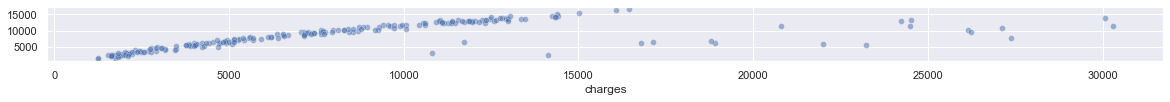

In [53]:
#Making the scatter plot
sns.scatterplot(y_test, y_pred, alpha=0.5)

In [54]:
#Testing prediction
data = {"age":20, "sex":1, "bmi":20, "children":5, "region": 2}
index=[0]
cust_df=pd.DataFrame(data, index)
cust_df

age  sex  bmi  children  region
0   20    1   20         5       2

In [55]:
cost_prediction= model.predict(cust_df)
print("The medical insurance cost fo the new customer is: ", cost_prediction)

The medical insurance cost fo the new customer is:  [4821.39142459]


## Playing with different Regression models

# Linear Regression 

In [56]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
x = df_healthcare.drop(['charges'], axis = 1)
y = df_healthcare['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824413
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


# Ridge Regression

In [58]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495807
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063138


# Lasso Regression

In [59]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039533
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224705


# Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df_healthcare.drop(['charges'], axis=1)
y = df_healthcare.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3628893.887, MSE test data: 19730453.910
R2 train data: 0.971, R2 test data: 0.877


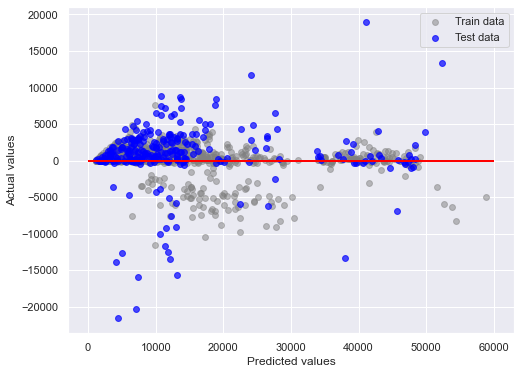

In [61]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')


Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

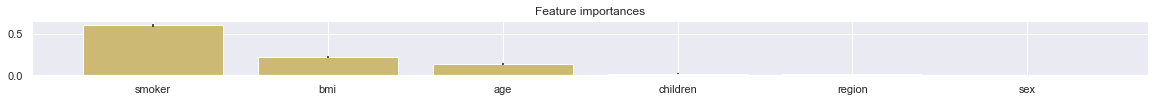

In [62]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

## Khaing: Model

In [25]:
# add color array to set_palette
# function of seaborn
sns.set_palette(my_colors)

In [26]:
smoker_df = insurance_df[insurance_df.smoker == 'yes']
smoker_df

age     sex       bmi  children smoker     region      charges  \
0    -1.438764  female -0.453320         0    yes  southwest  16884.92400   
11    1.622887  female -0.717432         0    yes  southeast  27808.72510   
14   -0.869155    male  1.881033         0    yes  southeast  39611.75770   
19   -0.655551    male  0.760609         0    yes  southwest  36837.46700   
23   -0.370746  female  0.206139         1    yes  northeast  37701.87680   
...        ...     ...       ...       ...    ...        ...          ...   
1313 -1.438764  female  0.662182         2    yes  southwest  36397.57600   
1314 -0.655551  female -1.149689         3    yes  northwest  18765.87545   
1321  1.622887    male -0.650994         0    yes  northeast  28101.33305   
1323  0.198863  female  1.592315         2    yes  southeast  43896.37630   
1337  1.551686  female -0.261388         0    yes  northwest  29141.36030   

      smoker_values  
0                 1  
11                1  
14                1  
19                1  
23                1  
...             ...  
1313              1  
1314              1  
1321              1  
1323              1  
1337              1  

[274 rows x 8 columns]

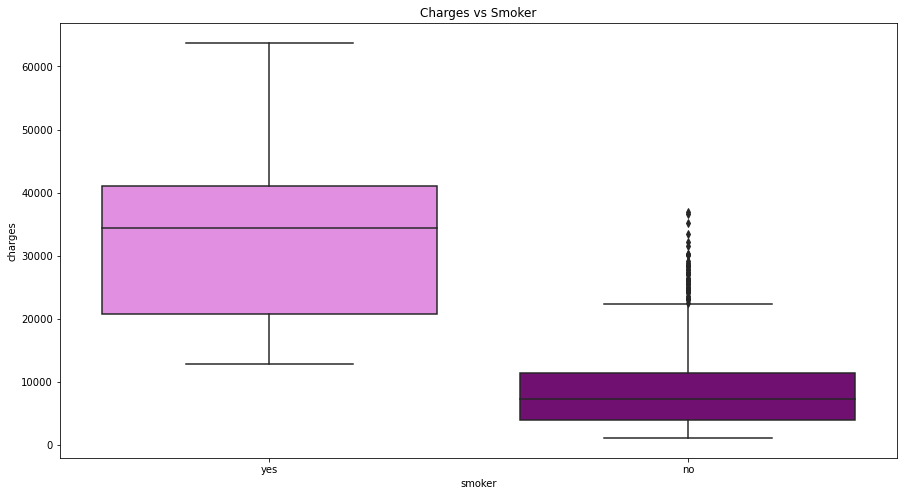

In [6]:
plt.subplots(1,1,figsize=(15,8))
plt.title('Charges vs Smoker')
sns.boxplot(x='smoker', y='charges', data= insurance_df, palette=my_colors)
plt.show()

<AxesSubplot:title={'center':'Charges vs Region vs Smoker'}, xlabel='region', ylabel='charges'>

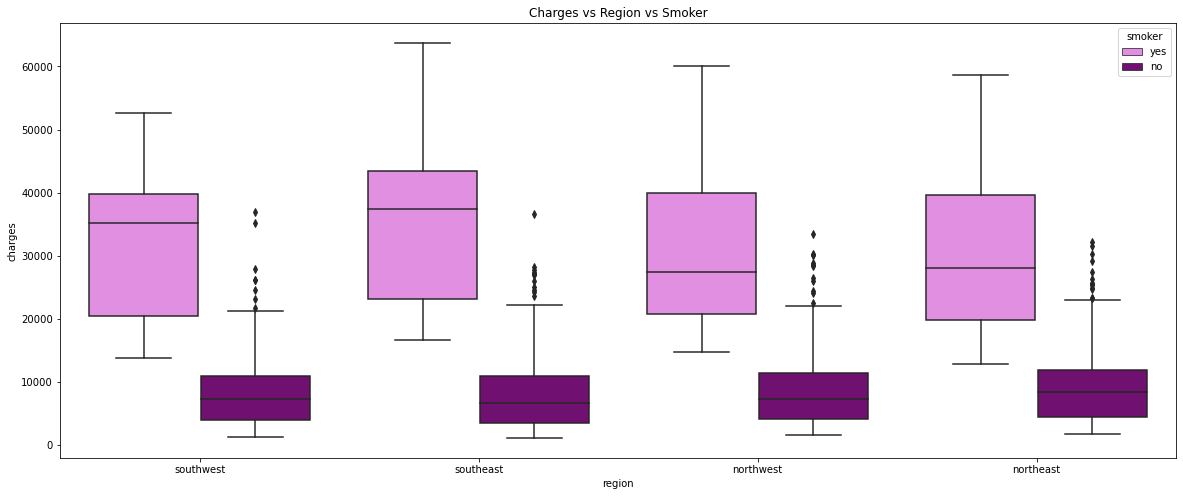

In [31]:
plt.subplots(1,1,figsize=(20,8))
plt.title('Charges vs Region vs Smoker')
sns.boxplot(x='region', y='charges', hue='smoker', data=insurance_df, palette=my_colors)

In [9]:
# Preprocessing of data

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
#Data pre-processing
#encoding the categorical features
# sex 0 or 1
label = LabelEncoder()
label.fit(insurance_df.sex.drop_duplicates())
insurance_df.sex = label.transform(insurance_df.sex)
# smoker or not
label.fit(insurance_df.smoker.drop_duplicates())
insurance_df.smoker = label.transform(insurance_df.smoker)
#region, each region has a number
label.fit(insurance_df.region.drop_duplicates())
insurance_df.region = label.transform(insurance_df.region)

insurance_df

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [108]:
# Data standardlization 

In [109]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

insurance_df[['age', 'bmi']]=sc.fit_transform(insurance_df[['age', 'bmi']])

insurance_df.head()

age  sex       bmi  children  smoker  region      charges
0 -1.438764    0 -0.453320         0       1       3  16884.92400
1 -1.509965    1  0.509621         1       0       2   1725.55230
2 -0.797954    1  0.383307         3       0       2   4449.46200
3 -0.441948    1 -1.305531         0       0       1  21984.47061
4 -0.513149    1 -0.292556         0       0       1   3866.85520

In [110]:
# Training Data and validation

In [111]:
from sklearn.model_selection import train_test_split,cross_val_score

x=insurance_df.drop(['charges'], axis='columns')
y=np.log(insurance_df['charges'])

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=11)

x_train.shape, x_test.shape

((1003, 6), (335, 6))

In [112]:
len(x_test), len(x_train), len(insurance_df)

(335, 1003, 1338)

In [113]:
# Select the best model ( Train and Test the model) 

In [114]:
# Linear Regression

In [115]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [116]:
x = insurance_df.drop(['charges'], axis = 1)
y = insurance_df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))
print(Lin_reg.score(x_train, y_train))

8366.220879490567
[ 3567.2416658    -24.32455098  2001.91202253   443.72929547
 23568.87948381  -288.50857254]
0.799874714544996
0.7368306228430945


In [117]:
# Ridge Regression

In [118]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))
print(Ridge.score(x_train, y_train))

8378.846540814913
[ 3.56428821e+03 -2.15169263e+01  2.00080497e+03  4.44323377e+02
  2.35007304e+04 -2.88968531e+02]
0.7996925500479961
0.7368253622791383


In [119]:
# Lasso Regression

In [120]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))
print(Lasso.score(x_train, y_train))

8365.914452092611
[ 3.56706684e+03 -2.34525271e+01  2.00168492e+03  4.43597274e+02
  2.35675849e+04 -2.88324728e+02]
0.7998682208502539
0.7368306188206066


In [121]:
# Problem ******* 

In [122]:
def train_model(model):
    return model.fit(x_train, y_train)

models={'Linear Regression': Lin_reg,
        'Ridge Regression': Ridge,
        'Lasso Regression': Lasso}

for model in models.values():
    train_model(model)

In [123]:
for name, model in models.items():
    print(model,f'R2 score {model.score(x_test,y_test)}')

LinearRegression() R2 score 0.799874714544996
Ridge(alpha=0.5) R2 score 0.7996925500479961
Lasso(alpha=0.2, normalize=False) R2 score 0.7998682208502539


In [124]:
for name, model in models.items():
    print(model,f'R2 score {model.score(x_train,y_train)}')

LinearRegression() R2 score 0.7368306228430945
Ridge(alpha=0.5) R2 score 0.7368253622791383
Lasso(alpha=0.2, normalize=False) R2 score 0.7368306188206066


In [125]:
Lin_reg.score(x_test, y_test), Lin_reg.score(x_train, y_train)

(0.799874714544996, 0.7368306228430945)

In [126]:
# Cross Validation

In [127]:
cross_val_score(Lin_reg,x_test,y_test,cv=10).mean()
mean_squared_error(y_test,Lin_reg.predict(x_test))
### problem ? prediction error number is very large.

31845929.13415941

In [128]:
cross_val_score(Ridge,x_test,y_test,cv=10).mean()

0.7579611023584116

In [129]:
cross_val_score(Lasso,x_test,y_test,cv=10).mean()

0.7575590663890394

In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
print(f'Train MSE {mean_squared_error(y_train,Lin_reg.predict(x_train))}')
print(f'Test MSE {mean_squared_error(y_test,Lin_reg.predict(x_test))}')

Train MSE 37729580.50984919
Test MSE 31845929.13415941


In [132]:
# Lin_reg.predict(x_test) (prediction has a problem ?)

In [133]:
test=pd.DataFrame({'True values': np.exp(y_test),
                   'Linear Regression Predictions': np.exp(Lin_reg.predict(x_test)),
                   'Ridge Regression Predictions': np.exp(Ridge.predict(x_test)),
                   'Lasso Regression Predictions': np.exp(Lasso.predict(x_test))})

In [134]:
# Linear Regression vs Ridge Regression vs Lasso Regression

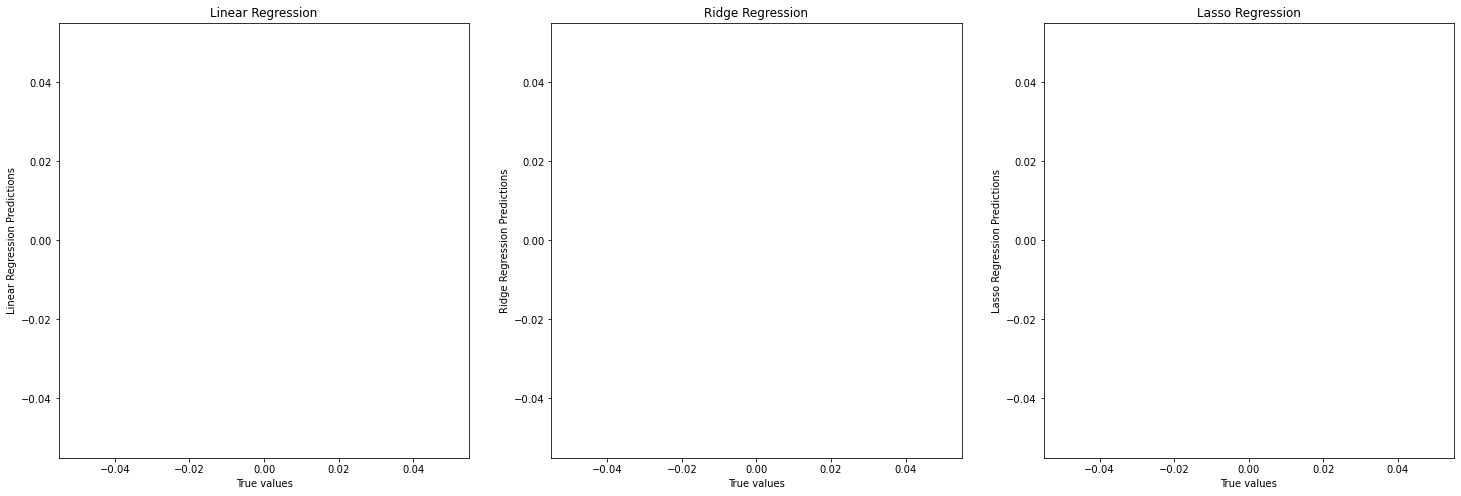

In [135]:
fig,(ax_1,ax_2,ax_3)=plt.subplots(1,3,figsize=(25,8))

ax_1.set_title('Linear Regression')
sns.scatterplot(x='True values',y='Linear Regression Predictions',data=test,ax=ax_1,color='c')
sns.lineplot(x='True values',y='True values',data=test,ax=ax_1,color='c')

ax_2.set_title('Ridge Regression')
sns.scatterplot(x='True values',y='Ridge Regression Predictions',data=test,ax=ax_2,color='r')
sns.lineplot(x='True values',y='True values',data=test,ax=ax_2,color='r')

ax_3.set_title('Lasso Regression')
sns.scatterplot(x='True values',y='Lasso Regression Predictions',data=test,ax=ax_3,color='lightgreen')
sns.lineplot(x='True values',y='True values',data=test,ax=ax_3,color='lightgreen')

plt.show()

In [136]:
test[:50]

True values  Linear Regression Predictions  \
578           inf                            inf   
610           inf                            inf   
569           inf                            inf   
1034          inf                            inf   
198           inf                            inf   
981           inf                            inf   
31            inf                            inf   
1256          inf                            inf   
1219          inf                            inf   
1320          inf                            inf   
613           inf                            inf   
1107          inf                            inf   
1263          inf                            inf   
406           inf                            inf   
795           inf                            inf   
970           inf                            inf   
824           inf                            inf   
141           inf                            inf   
1173          inf                            inf   
1042          inf                            inf   
966           inf                            inf   
467           inf                            inf   
1098          inf                            inf   
757           inf                            inf   
1097          inf                            inf   
319           inf                            inf   
1286          inf                            inf   
459           inf                            inf   
5             inf                            inf   
517           inf                            inf   
54            inf                            inf   
1062          inf                            inf   
722           inf                            inf   
45            inf                            inf   
989           inf                            inf   
1032          inf                            inf   
1121          inf                            inf   
34            inf                            inf   
667           inf                            inf   
1268          inf                            inf   
863           inf                            inf   
108           inf                            inf   
638           inf                            inf   
55            inf                            inf   
161           inf                            inf   
1019          inf                            inf   
159           inf                            inf   
1310          inf                            inf   
1220          inf                            inf   
661           inf                            inf   

      Ridge Regression Predictions  Lasso Regression Predictions  
578                            inf                           inf  
610                            inf                           inf  
569                            inf                           inf  
1034                           inf                           inf  
198                            inf                           inf  
981                            inf                           inf  
31                             inf                           inf  
1256                           inf                           inf  
1219                           inf                           inf  
1320                           inf                           inf  
613                            inf                           inf  
1107                           inf                           inf  
1263                           inf                           inf  
406                            inf                           inf  
795                            inf                           inf  
970                            inf                           inf  
824                            inf                           inf  
141                            inf                           inf  
1173                           inf                           inf  
1042         

In [137]:
# Conclusion 

# After compare between three different regression method , we can see linear regression only has a smaller squared error.   
# Compared to Ridge regression and lasso regression, only Linear regression can provide very good predictions in general.

## Stacking Models

In [ ]:
X = df_healthcare.drop("Total_Expenditure", axis=1)
X

Family_Size  Region  Age  Sex  Race  Education_Level  Highest_Degree  \
0                2       2   27    2     1               16               4   
1                2       2   25    1     1               17               4   
2                6       2   34    2     1               10               3   
3                6       2   39    1     1               10               3   
4                4       2   36    2     1               17               5   
...            ...     ...  ...  ...   ...              ...             ...   
16760            2       3   59    2     1               16               4   
16761            2       3   66    1     1               16               4   
16762            1       3   69    2     2               17               5   
16763            3       4   33    2     1               16               4   
16764            3       4   32    1     1               13               3   

        BMI  Tobacco_Use  Total_Personal_Income  Exp_Pocket  Exp_Medicare  \
0      21.4            3                  32000         225             0   
1      30.6            3                      0         136             0   
2      28.2            3                  25000          74             0   
3      28.7            3                  30000           0             0   
4      21.5            3                  30217         232             0   
...     ...          ...                    ...         ...           ...   
16760  34.3            3                  43670         966             0   
16761  31.0            2                   8999        9288            18   
16762  45.7            3                  55132         859          1265   
16763  29.2            3                  18000        2114             0   
16764  27.3            3                  47874          90             0   

       Total_Medicaid  Exp_VA  Total_Priv_Tri  Total_Other  
0                2037       0             107            0  
1                   0       0            1904            0  
2                   0       0              99            0  
3                   0       0               0            0  
4                   0       0             303            0  
...               ...     ...             ...          ...  
16760               0       0            1987            0  
16761               0       0            5354            0  
16762               0       0             313            0  
16763               0       0           15706            0  
16764               0       0               0            0  

[16765 rows x 16 columns]

In [ ]:
y = df_healthcare["Total_Expenditure"].copy()
y

0         2368
1         2040
2          173
3            0
4          535
         ...  
16760     2953
16761    14660
16762     2439
16763    17820
16764       90
Name: Total_Expenditure, Length: 16765, dtype: int64

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(0.1))    
X = selection.fit_transform(X)
X.shape

(16765, 16)

In [ ]:
# Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [ ]:
X_train.shape, X_test.shape

((13412, 16), (3353, 16))

In [ ]:
#Build Classification models

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#numeric_cols = ['age', 'bmi', 'children'] 
#scaler = StandardScaler()
#scaler.fit(insurance_df[numeric_cols])
#insurance_df

In [ ]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[2133 1868  161 ... 2188 6993   79]


In [ ]:
#K Nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.12861616462869072
- MCC: 0.11457716982415828
- F1 score: 0.08683819360751849
----------------------------------
Model performance for Test set
- Accuracy: 0.08947211452430659
- MCC: 0.0739095632146005
- F1 score: 0.058309818226310914


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)